In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import IsolationForest
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")
%matplotlib inline

In [58]:
#Data importing
df=pd.read_csv(r'C:\Users\User\Downloads\student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [59]:
#selecting the required variables
y = df['G3'] #dependent variable
x = df[['Medu', 'Fedu', 'famrel',  'freetime', 'freetime','goout', 'Dalc', 'Walc', 'health', 'absences']] #independent variables


In [60]:
y.isnull().sum() #checking for missing values

0

In [61]:
x.isnull().sum() #checking for missing values

Medu        0
Fedu        0
famrel      0
freetime    0
freetime    0
goout       0
Dalc        0
Walc        0
health      0
absences    0
dtype: int64

<Axes: >

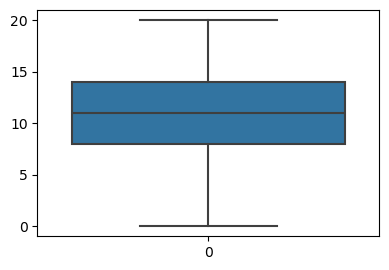

In [62]:
#ploting boxplots to check for outliers
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(y) #boxplot for dependent variable

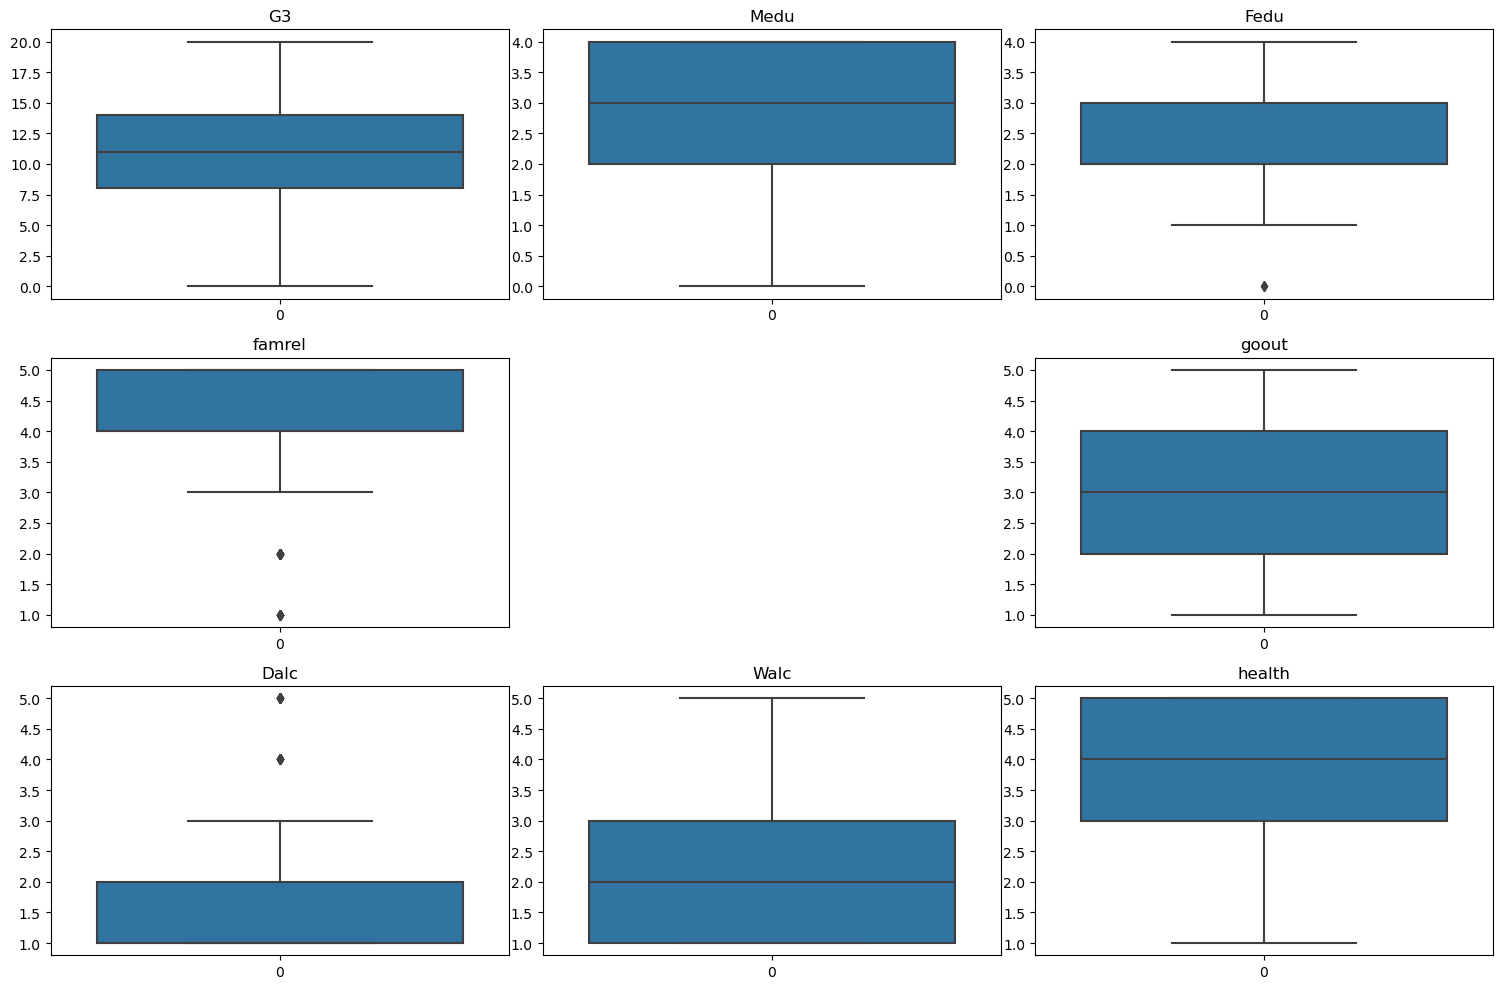

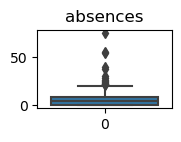

In [63]:
#ploting boxplot for All variables
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(y) #boxplot for dependent variable
plt.title( 'G3') #title for boxplot

plt.subplot(3,3,2)
sns.boxplot(x['Medu'])
plt.title('Medu') #boxplot for Medu

plt.subplot(3,3,3)
sns.boxplot(x['Fedu'])
plt.title('Fedu') #boxplot for Fedu

plt.subplot(3,3,4)
sns.boxplot(x['famrel'])
plt.title('famrel') #boxplot for famrel


plt.subplot(3,3,6)
sns.boxplot(x['goout']) #boxplot for goout
plt.title('goout') #boxplot for goout

plt.subplot(3,3,7)
sns.boxplot(x['Dalc']) #boxplot for Dalc
plt.title('Dalc') #boxplot for Dalc

plt.subplot(3,3,8)
sns. boxplot(x['Walc']) #boxplot for Walc
plt.title('Walc') #boxplot for Walc

plt.subplot(3,3,9)
sns.boxplot(x['health']) #boxplot for health
plt.title('health') #boxplot for health
plt.tight_layout() #adjusting the layout
plt.show()

plt.subplot(4,4,1)
sns.boxplot(x['absences']) #boxplot for absences
plt.title('absences') #boxplot for absences
plt.tight_layout() #adjusting the layout
plt.show()

In [64]:
# Function to remove outliers using Isolation Forest
def remove_outliers_isolation_forest(x, contamination=0.1):
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    preds = iso_forest.fit_predict(x)
    mask = preds != -1
    return df[mask]

# Remove outliers
x_2 = remove_outliers_isolation_forest(x, contamination=0.1)
print("DF_NO_OUTLIER:")
print(x_2) #dataframe without outliers

DF_NO_OUTLIER:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
386     MS   F   18       R     GT3       T     4     4   teacher   at_home   
387     MS   F   19       R     GT3       T     2     3  services     other   
388     MS   F   18       U     LE3       T     3     1   teacher  services   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dal

In [65]:
#Removing outliers in dependent variable
y_2= remove_outliers_isolation_forest(y, contamination=0.1) #dependent variable
print(y_2) #dataframe without outliers

ValueError: Expected 2D array, got 1D array instead:
array=[ 6.  6. 10. 15. 10. 15. 11.  6. 19. 15.  9. 12. 14. 11. 16. 14. 14. 10.
  5. 10. 15. 15. 16. 12.  8.  8. 11. 15. 11. 11. 12. 17. 16. 12. 15.  6.
 18. 15. 11. 13. 11. 12. 18. 11.  9.  6. 11. 20. 14.  7. 13. 13. 10. 11.
 13. 10. 15. 15.  9. 16. 11. 11.  9.  9. 10. 15. 12.  6.  8. 16. 15. 10.
  5. 14. 11. 10. 10. 11. 10.  5. 12. 11.  6. 15. 10.  8.  6. 14. 10.  7.
  8. 18.  6. 10. 14. 10. 15. 10. 14.  8.  5. 17. 14.  6. 18. 11.  8. 18.
 13. 16. 19. 10. 13. 19.  9. 16. 14. 13.  8. 13. 15. 15. 13. 13.  8. 12.
 11.  9.  0. 18.  0.  0. 12. 11.  0.  0.  0.  0. 12. 15.  0.  9. 11. 13.
  0. 11.  0. 11.  0. 10.  0. 14. 10.  0. 12.  8. 13. 10. 15. 12.  0.  7.
  0. 10.  7. 12. 10. 16.  0. 14.  0. 16. 10.  0.  9.  9. 11.  6.  9. 11.
  8. 12. 17.  8. 12. 11. 11. 15.  9. 10. 13.  9.  8. 10. 14. 15. 16. 10.
 18. 10. 16. 10. 10.  6. 11.  9.  7. 13. 10.  7.  8. 13. 14.  8. 10. 15.
  4.  8.  8. 10.  6.  0. 17. 13. 14.  7. 15. 12.  9. 12. 14. 11.  9. 13.
  6. 10. 13. 12. 11.  0. 12. 12.  0. 12.  0. 18. 13.  8.  5. 15.  8. 10.
  8.  8. 12.  8. 13. 11. 14.  0. 18.  8. 12.  9.  0. 17. 10. 11. 10.  0.
  9. 14. 11. 14. 10. 12.  9.  9.  8. 10.  8. 10. 12. 10. 11. 11. 19. 12.
 14. 15. 11. 15. 13. 18. 14. 11.  0.  8. 14. 16. 11. 10. 14. 18. 13. 12.
 18.  8. 12. 10.  0. 13. 11. 11. 13. 11.  0.  9. 10. 11. 13.  9. 11. 15.
 15. 11. 16. 10.  9. 14.  8. 14.  0.  0.  0. 15. 13.  0. 17. 10. 11.  0.
 15.  0. 10. 14. 16.  9. 15. 13.  8. 13.  8.  8. 11.  9. 13. 11. 10. 16.
 13. 12. 10. 15. 12. 10. 13.  0. 10. 11.  9. 12. 11.  5. 19. 10. 15. 10.
 15. 10. 14.  7. 10.  0.  5. 10.  6.  0.  8.  0.  9. 16.  7. 10.  9.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [95]:
#Selected variables for testing model
y_2= df['G3'] #DataFrame after removing outliers using Isolation Forest
x_2 = df[['Medu', 'Fedu', 'freetime', 'Walc', 'absences', 'famrel', 'goout', 'Dalc', 'health']] #DataFrame after removing outliers using Isolation Forest

In [96]:
#Splitting the data into train and test
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size = 0.2, random_state = 42) #splitting the data into train and test


In [98]:
#Linear Regression
x_2_train_CONST=sm.add_constant(x_2_train)
model=sm.OLS(y_2_train,x_2_train_CONST) #OLS stands for Ordinary Least Square

In [100]:
#model summary
results=model.fit()
results.summary() #summarizing the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.931
Date:                Tue, 18 Jun 2024   Prob (F-statistic):            0.00239
Time:                        14:43:14   Log-Likelihood:                -916.39
No. Observations:                 316   AIC:                             1853.
Df Residuals:                     306   BIC:                             1890.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8015      1.659      4.704      0.000       4.538      11.065
Medu           0.9398      0.301      3.126      0.002       0.348       1.531
Fedu           0.0479      0.297      0.161      0.872      -0.537       0.633
freetime       0.1565      0.271      0.577      0.564      -0.377       0.690
Walc           0.1848      0.274      0.674      0.501      -0.355       0.725
absences       0.0249      0.031      0.807      0.420      -0.036       0.086
famrel         0.4764      0.293      1.624      0.105      -0.101       1.054
goout         -0.6333      0.270     -2.346      0.020      -1.164      -0.102
Dalc          -0.2974      0.366     -0.813      0.417      -1.018       0.423
health        -0.1936      0.181     -1.067      0.287      -0.551       0.163
==============================================================================
Omnibus:                       26.844   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.130
Skew:                          -0.745   Prob(JB):                     1.74e-07
Kurtosis:                       3.382   Cond. No.                         79.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

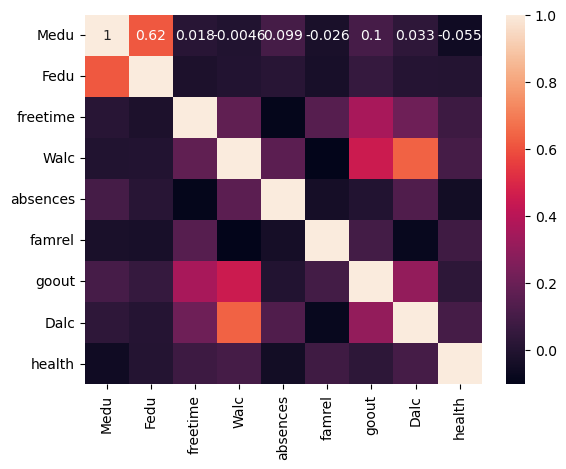

In [101]:
sns.heatmap(x_2_train.corr(), annot=True) #plotting the correlation matrix
plt.show()

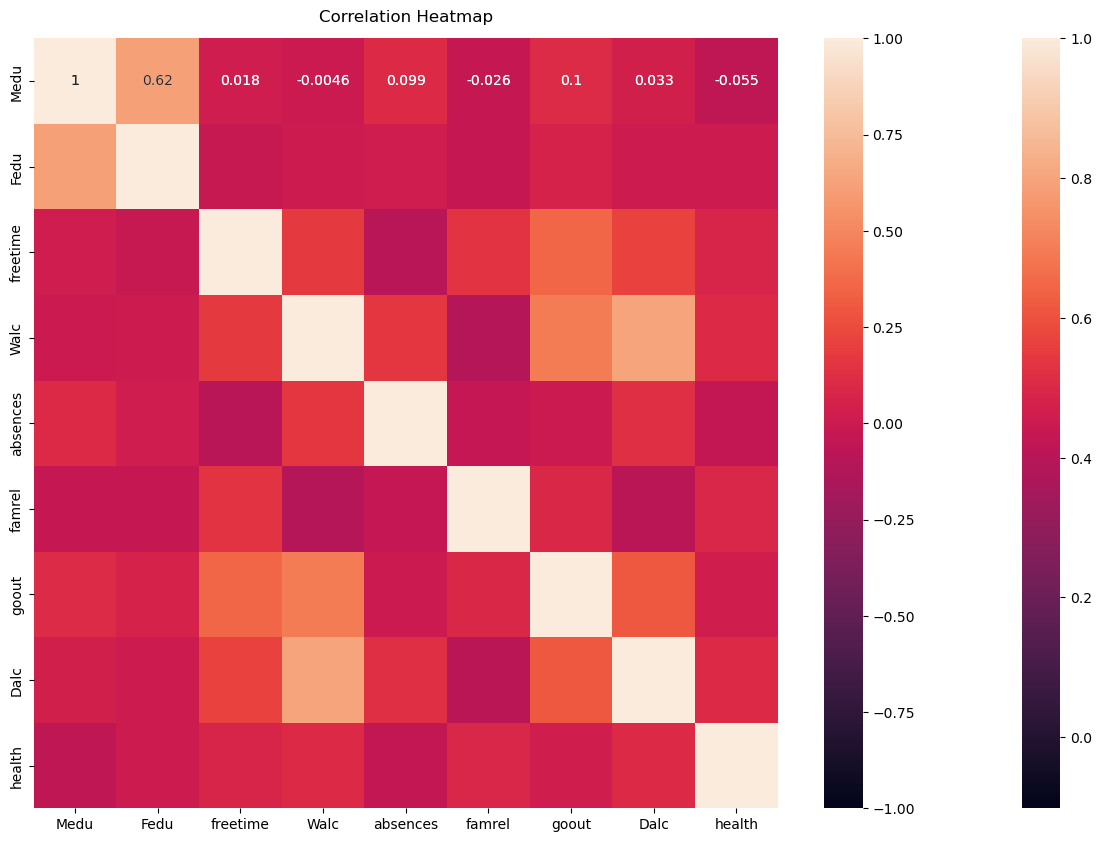

In [102]:
#creating a correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(x_2_train.corr(), annot=True)
heatmap = sns.heatmap(x_2_train.corr(), vmin=-1, vmax=1, annot=True) #plotting the correlation matrix
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12) #setting the title
plt.show()

In [103]:
#Y_predict
lr = LinearRegression() #creating an object of LinearRegression
lr.fit(x_2_train, y_2_train) #training the model
y_pred = lr.predict(x_2_test) #predicting the values
y_pred

array([11.14015685,  8.76582545, 10.72794357,  9.74681529,  9.64216484,
        8.43816295, 11.19650002,  8.94548579, 10.55926583, 11.93390031,
       12.26292086, 12.23167732,  9.84044442, 11.49382106,  9.38786282,
        9.56683343,  9.1710158 ,  8.77731743,  7.4685385 ,  8.88822281,
       11.53524698,  8.61555613, 11.2816696 , 11.05012125, 11.00999385,
       12.15713885, 10.24820159, 11.84964518, 11.49681151, 11.60901925,
       11.65363355,  9.24528774, 12.14766125, 11.43113587, 10.72229069,
       11.89721512, 10.79231782, 11.24668471, 11.11018383,  8.93726857,
        7.38085769,  9.15833205, 11.62476946,  8.88610722, 10.27007157,
       12.30186289,  9.18023668, 10.56772234,  9.51923649, 11.75106293,
       11.21814449, 12.50661372, 12.37249646, 12.41975128, 11.36494785,
        8.8867208 ,  8.61199855,  8.26186165, 13.04992943, 12.41325677,
        8.88118814, 10.95120706,  8.31943318, 10.37345898, 10.5984139 ,
       10.60557912,  7.9415753 ,  9.01231636, 10.68969827, 12.79

In [104]:
#Residual
residual = y_2_test - y_pred
residual

78    -1.140157
371    3.234175
248   -5.727944
55     0.253185
390   -0.642165
         ...   
364    3.195938
82    -3.883459
114   -1.588992
3      3.898913
18    -5.289583
Name: G3, Length: 79, dtype: float64

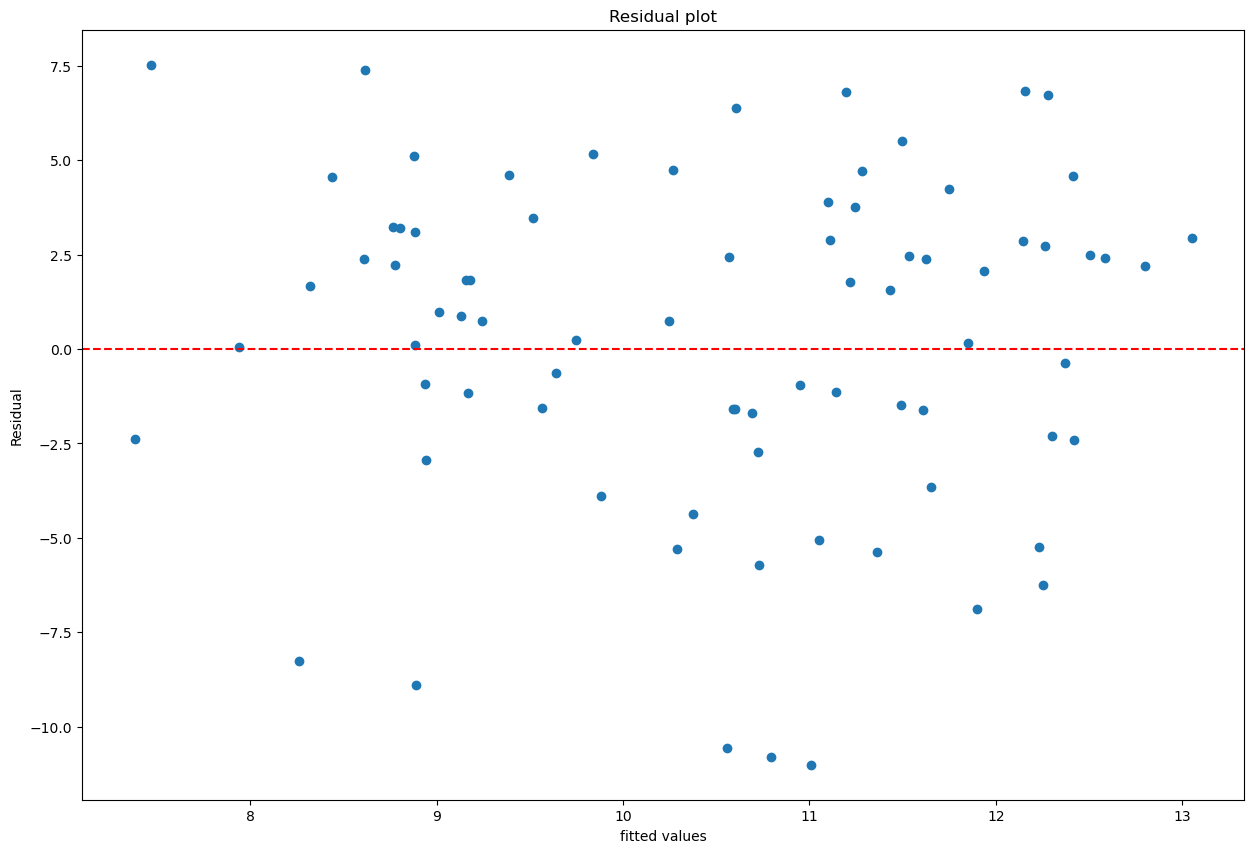

In [105]:
#ploting a residual plot
plt. figure(figsize=(15,10))
plt.scatter(y_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel('Residual')
plt.xlabel('fitted values')
plt.title('Residual plot')
plt.show()

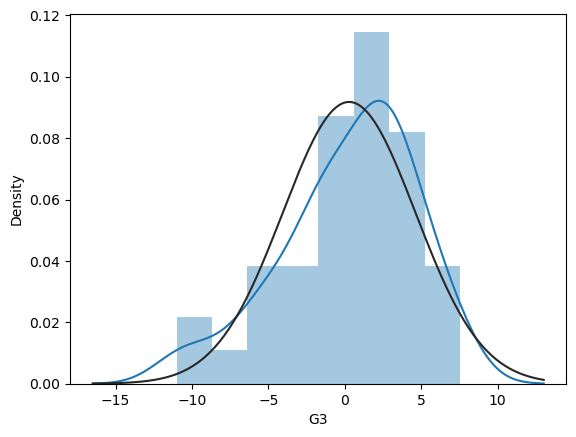

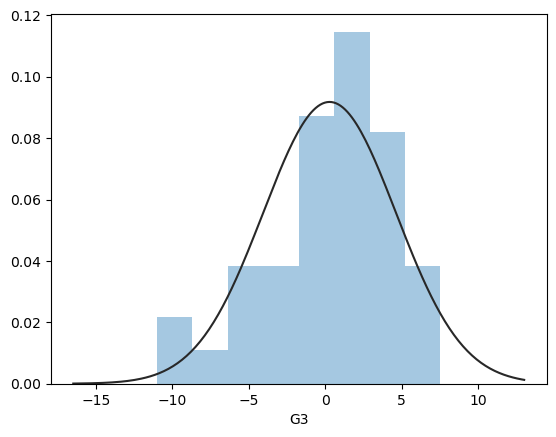

AttributeError: Line2D.set() got an unexpected keyword argument 'cumulative'

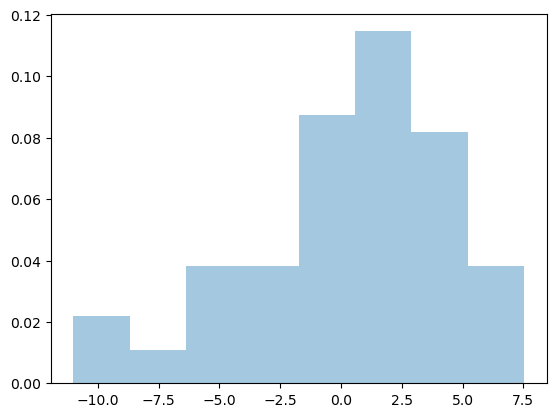

In [106]:
#plot normal distribution curve  and check if it's symmetric
sns.distplot(residual, fit=stats.norm) #plot normal distribution curve  and check if it's symmetric
plt.show() #plot normal distribution curve  and check if it's symmetric
sns.distplot(residual, fit=stats.norm, kde=False) #plot normal distribution curve  and check if it's symmetric
plt.show() #plot normal distribution curve  and check if it's symmetric
sns.distplot(residual, fit=stats.norm, kde=False, fit_kws={'cumulative': True}) #plot normal distribution curve  and check if it's symmetric
plt.show() #plot normal distribution curve  and check if it's symmetric
sns.distplot(residual, fit=stats.norm, kde=False, fit_kws={'cumulative': True}, hist_kws={'cumulative': True}) #plot normal distribution curve  and check if it's symmetric
plt.show() #plot normal distribution curve  and check if it's symmetric


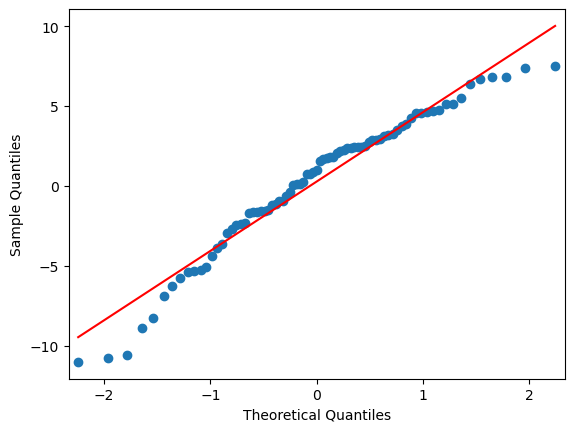

In [107]:
#ploting a q-q plot
import statsmodels.api as sm
sm.qqplot(residual, line='s') #ploting a q-q plot
plt.show()

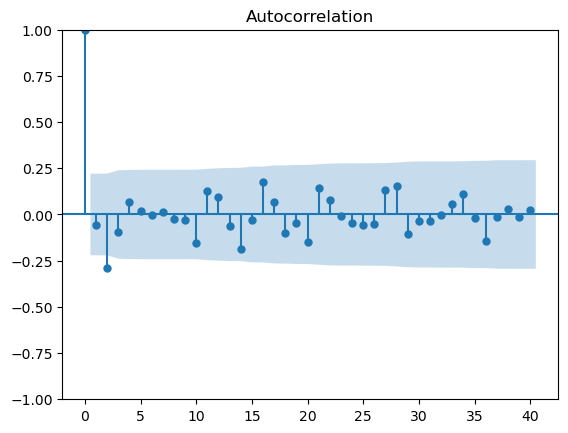

In [108]:
#4. TEST FOR autocorrelation
acf=smt.graphics.plot_acf(residual,lags=40,alpha=.05)
acf.show()